# Plotting IMD Rainfall Data For Two Different Cities in Jupyter Notebook using Python's Matplotlib Library
Simillarly to the previous lab,First we downloaded the 2024 rainfall data and saved in our computer, Jump to the jupyter notebook and imported xarray function as xr to extract the data from the file then we copied the path of that file and pasted in the jupyter cell by creating pt variable. Further we printed the data set by calling path from netcdf engine by creating ds variable then printed the same. We got the rf data variables as(time ,latitude(lat) and longitude (log)).

In [ ]:
import xarray as xr
pt = 'C:/Users/user/Downloads/Shreyas LAB/RF25_ind2024_rfp25.nc'
ds= xr.open_dataset(pt, engine="netcdf4")
print(ds)


<xarray.Dataset>
Dimensions:  (time: 366, lon: 135, lat: 129)
Coordinates:
  * time     (time) datetime64[ns] 2024-01-01 2024-01-02 ... 2024-12-31
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
Data variables:
    rf       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.7.1 (http://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Tue Jan 21 14:21:53 2025: cdo -f nc import_binary pt25.ctl ...
    CDO:          Climate Data Operators version 1.9.7.1 (http://mpimet.mpg.d...


C:\Users\user\anaconda3\Lib\site-packages\xarray\coding\times.py:154: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


# Plotting the above data for two different cities of specific latitude(lat),and longitude(lon).
Here, We have given the lat and lon for two different cities one is Bubaneshwar and other is my home town Shahapur,Then plotted the data in the same graph and labelled it with different colors.

<xarray.DataArray 'rf' (time: 366, lat: 129, lon: 135)>
[6373890 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2024-01-01 2024-01-02 ... 2024-12-31
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
Attributes:
    long_name:  GRIDDED RAINFALL
<xarray.DataArray 'rf' (time: 366)>
[366 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2024-01-01 2024-01-02 ... 2024-12-31
    lon      float64 85.0
    lat      float64 20.0
Attributes:
 <xarray.DataArray 'rf' (time: 366)>
[366 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2024-01-01 2024-01-02 ... 2024-12-31
    lon      float64 76.75
    lat      float64 16.75
Attributes:
    long_name:  GRIDDED RAINFALL


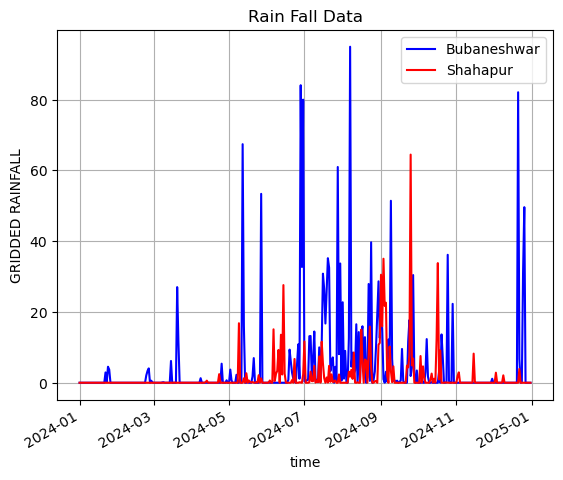

In [101]:
import matplotlib.pyplot as plt
rain = ds['rf']
lon = ds['lon']
lat = ds['lat']

lat1 = 20.0
lon1 = 85.0
lat2 = 16.7
lon2 = 76.8
print(rain)
bbs = rain.sel(lat=lat1,lon=lon1,method = 'nearest')
shp = rain.sel(lat=lat2,lon=lon2,method = 'nearest')
print(bbs,shp)
bbs.plot(color = 'blue',label ='Bubaneshwar')
shp.plot(color = 'red',label = 'Shahapur')
plt.title("Rain Fall Data")
plt.legend()
plt.grid(True)

In [61]:
# days rain didnt happened
import numpy as np 
bbs1 = len(bbs.values[bbs.values > 0])
shp1 = len(shp.values[shp.values > 0])
bbs1,shp1

(145, 110)

# Histogram Plot for the two cities 
Here,we have taken two max values for those two cities and created seperate arrays for both,printed and plotted the histogram and labbeled it.

94 64


Text(0.5, 0, "Rainfall in 'mm'")

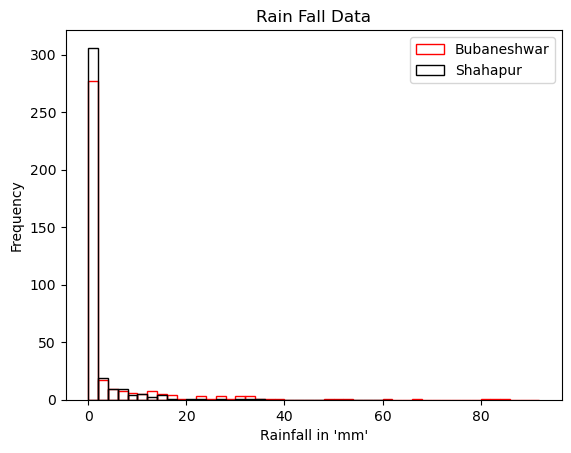

In [62]:
maxval_1 = int(np.nanmax(bbs.values))
maxval_2 = int(np.nanmax(shp.values))
arr = np.array(range(0, maxval_1,2))
arr
arr_1 = np.array(range(0, maxval_2,2))
arr_1
print(maxval_1,maxval_2)
plt.hist(bbs, bins=arr, edgecolor='red',fill = False,rwidth=1.8,label = 'Bubaneshwar')
plt.hist(shp, bins=arr_1, edgecolor='black',fill = False,rwidth=1.8, label = 'Shahapur')
plt.legend()
plt.title("Rain Fall Data")
plt.ylabel("Frequency")
plt.xlabel("Rainfall in 'mm'")

# Plotting and obtaining the mean value of the rainfall data for specific mansoon months ie., JJAS for both the cities 
We have plotted the graph for the JJAS months and calculated mean rainfall for both the cities 

C:\Users\user\AppData\Local\Temp\ipykernel_11408\1816230339.py:9: RuntimeWarning: Mean of empty slice
  mean_jjas = np.nanmean(rain_jjas_2024,axis = 0)


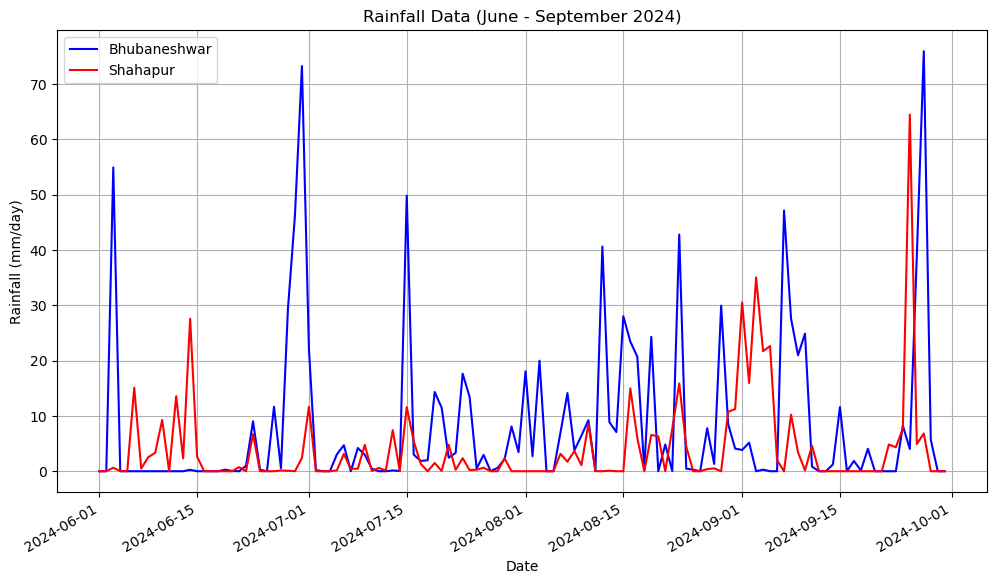

Mean rainfall for Bhubaneshwar (June-Sept 2024): 8.350000381469727 mm/day
Mean rainfall for Shahapur (June-Sept 2024): 4.010000228881836 mm/day


In [103]:
#Plotting the above data for specific latitude(lat) and longitude(lon).
# Defining the coordinates
lat1 = 20.0
lon1 = 85.5
lat2 = 16.7
lon2 = 76.8

rain_jjas_2024 = rain.sel(time=slice('2024-06-01', '2024-09-30'))
mean_jjas = np.nanmean(rain_jjas_2024,axis = 0)

# Selecting the rainfall data for the two locations from the filtered data
bbs = rain_jjas_2024.sel(lat=lat1, lon=lon1, method='nearest')
shp = rain_jjas_2024.sel(lat=lat2, lon=lon2, method='nearest')

# Creating the plot
plt.figure(figsize=(12, 6))
bbs.plot(color='blue', label='Bhubaneshwar')
shp.plot(color='red', label='Shahapur')

# Add plot details for clarity
plt.title("Rainfall Data (June - September 2024)")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm/day)")
plt.legend()
plt.grid(True)
plt.show()

#Calculating the mean rainfall for each location
mean_bbs = bbs.mean().values
mean_shp = shp.mean().values
mean_rainfall_bbs = np.round(mean_bbs, decimals=2)
mean_rainfall_shp = np.round(mean_shp, decimals=2)
print(f"Mean rainfall for Bhubaneshwar (June-Sept 2024): {mean_rainfall_bbs} mm/day")
print(f"Mean rainfall for Shahapur (June-Sept 2024): {mean_rainfall_shp} mm/day")

 # Mean along the time dimention for non monsoon rainfall 
Defined the two variables for months 1_5 and 10_12 months,and concatinated the both and obtained time dimesion and obtained and printed the mean values 

(243, 129, 135)
Shape of the mean rainfall array: (129, 135)


C:\Users\user\AppData\Local\Temp\ipykernel_11408\3594039779.py:9: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()
C:\Users\user\AppData\Local\Temp\ipykernel_11408\3594039779.py:10: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.clim(0,50)


Text(0.5, 0, 'Longitude')

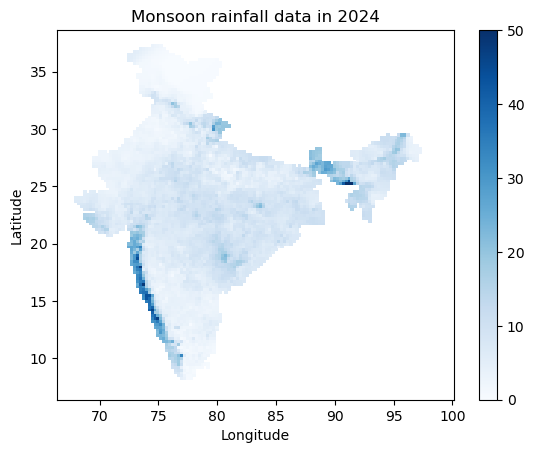

In [116]:
rain_non_jjas_2024_1_5 = rain.sel(time=slice('2024-01-01', '2024-05-30'))
rain_non_jjas_2024_10_12 = rain.sel(time=slice('2024-10-01','2024-12-31'))

combined_non_jjas_2024 = np.concatenate((rain_non_jjas_2024_1_5,rain_non_jjas_2024_10_12), axis = 0)
print(combined_non_jjas_2024.shape)
mean_rainfall_non_jjas = np.mean(combined_non_jjas_2024, axis=0)
print(f"Shape of the mean rainfall array: {mean_rainfall_non_jjas.shape}")

plt.pcolor(lon, lat,mean_jjas,cmap = 'Blues')
plt.colorbar()
plt.clim(0,50)
plt.title("Monsoon rainfall data in 2024")
plt.ylabel("Latitude")
plt.xlabel("Longitude")